Вариант:

In [19]:
(ord('И') + ord('Д')) % 5

2

In [1]:
import numpy as np
import pandas as pd

In [2]:
data = pd.read_csv("lastfm.csv")

## 1. Выбор стран для набора данных

In [5]:
selected = data[data['country'].isin(['Germany', 'Finland', 'Russian Federation', 'Sweden','Poland'])]
print(selected.shape[0])
selected.head()

75574


,user,artist,sex,country
0,1,red hot chili peppers,f,Germany
1,1,the black dahlia murder,f,Germany
2,1,goldfrapp,f,Germany
3,1,dropkick murphys,f,Germany
4,1,le tigre,f,Germany


## 2. Подготовка для ассоциативного анализа

In [101]:
# группировка
groupped = selected.groupby('user')['artist'].apply(';'.join)
# бинаризация
binary_data = groupped.str.get_dummies(";")
binary_data.iloc[0:10,100:110]

,beastie boys,beatsteaks,beck,bee gees,behemoth,beirut,belle and sebastian,ben folds,ben folds five,ben harper
user,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0
19,0,0,1,0,0,1,0,0,0,0
28,0,0,0,0,0,0,0,0,0,0
33,0,0,0,0,0,0,1,0,0,0
39,0,0,0,0,0,0,0,0,0,0
42,0,0,0,0,0,0,0,0,0,0
50,0,0,0,0,0,1,0,0,0,0


In [3]:
import mlxtend.frequent_patterns as ml

## 3. Характерные комбинации музыкальных коллективов

In [102]:
# для всех стран и полов
freq_items = ml.apriori(binary_data.astype('bool'), min_support = 0.05, use_colnames = True)
print("Найдено %d характерных комбинаций" % len(freq_items))
freq_items

Найдено 63 характерных комбинаций


,support,itemsets
0,0.050365,(30 seconds to mars)
1,0.050852,([unknown])
2,0.068127,(ac/dc)
3,0.055474,(air)
4,0.057421,(amy winehouse)
...,...,...
58,0.085401,(the offspring)
59,0.091727,(the prodigy)
60,0.058151,(the white stripes)
61,0.051825,(tool)


Характерные комбинации для выборок по странам, по полу

In [9]:
selected_DE = selected.loc[selected.country == 'Germany',  ['artist', 'user']].pivot_table(index = 'user', columns = 'artist', aggfunc = any, fill_value=False).astype('int')
freq_items_DE = ml.apriori(selected_DE.astype('bool'), min_support = 0.05, use_colnames = True)
print("Найдено %d характерных комбинаций для жителей Германии" % len(freq_items_DE))
freq_items_DE.sort_values(by='support', ascending=False)

Найдено 82 характерных комбинаций для жителей Германии


,support,itemsets
22,0.194909,(die Ärzte)
41,0.157518,(linkin park)
16,0.156722,(coldplay)
60,0.147176,(red hot chili peppers)
59,0.146380,(rammstein)
...,...,...
44,0.052506,(massive attack)
34,0.050915,(iron maiden)
77,0.050915,"(die Ärzte, linkin park)"
1,0.050119,(30 seconds to mars)


In [33]:
selected_FI = selected.loc[selected.country == 'Finland',  ['artist', 'user']].pivot_table(index = 'user', columns = 'artist', aggfunc = any, fill_value=False).astype('int')
freq_items_FI = ml.apriori(selected_FI.astype('bool'), min_support = 0.05, use_colnames = True)
print("Найдено %d характерных комбинаций для жителей Финляндии" % len(freq_items_FI))
freq_items_FI

Найдено 118 характерных комбинаций для жителей Финляндии


,support,itemsets
0,0.050980,(50 cent)
1,0.103922,(ac/dc)
2,0.056863,(air)
3,0.060784,(akon)
4,0.111765,(amorphis)
...,...,...
113,0.050980,"(metallica, rammstein)"
114,0.050980,"(sonata arctica, metallica)"
115,0.066667,"(metallica, system of a down)"
116,0.072549,"(nightwish, sonata arctica)"


In [24]:
selected_RU = selected.loc[selected.country == 'Russian Federation',  ['artist', 'user']].pivot_table(index = 'user', columns = 'artist', aggfunc = any, fill_value=False).astype('int')
freq_items = ml.apriori(selected_RU.astype('bool'), min_support = 0.05, use_colnames = True)
print("Найдено %d характерных комбинаций для жителей России" % len(freq_items))
freq_items[0:10]

Найдено 43 характерных комбинаций для жителей России


,support,itemsets
0,0.056051,(30 seconds to mars)
1,0.054777,(apocalyptica)
2,0.056051,(arctic monkeys)
3,0.062420,(avril lavigne)
4,0.095541,(coldplay)
5,0.104459,(depeche mode)
6,0.050955,(enigma)
7,0.056051,(evanescence)
8,0.071338,(franz ferdinand)
9,0.052229,(god is an astronaut)


In [76]:
selected_f = selected.loc[selected.sex == 'f',  ['artist', 'user']].pivot_table(index = 'user', columns = 'artist', aggfunc = any, fill_value=False).astype('int')
freq_items = ml.apriori(selected_f.astype('bool'), min_support = 0.05, use_colnames = True)
print("Найдено %d характерных комбинаций для женщин" % len(freq_items))
freq_items

Найдено 87 характерных комбинаций для женщин


,support,itemsets
0,0.061205,(3 doors down)
1,0.087571,(30 seconds to mars)
2,0.064972,([unknown])
3,0.064030,(air)
4,0.050847,(alicia keys)
...,...,...
82,0.051789,(the strokes)
83,0.064972,(the white stripes)
84,0.054614,(tori amos)
85,0.051789,"(coldplay, radiohead)"


Из результатов мы видим, что больше совпадений находится у пользователей принадлежащих какой-либо одной группе. Причем больше всего характерных комбинаций по странам нашлось в Финляндии, а меньше в России.

## 4. Сравнение результатов поиска разных алгоритмов

In [101]:
selected_f = selected[selected.sex == 'f']
selected_RU_f = selected_f.loc[selected_f.country == 'Russian Federation', ['artist', 'user']].pivot_table(index = 'user', columns = 'artist', aggfunc = any, fill_value=False).astype('int')

# Применение Apriori для поиска частых наборов
freq_items_apriori = ml.apriori(selected_RU_f.astype('bool'), min_support = 0.05, use_colnames = True)
print("Найдено %d характерных комбинаций для женщин в России" % len(freq_items_apriori))
freq_items_apriori.sort_values(by='support', ascending = False)

Найдено 83 характерных комбинаций для женщин в России


,support,itemsets
48,0.234637,(placebo)
38,0.217877,(muse)
51,0.167598,(radiohead)
57,0.162011,(the beatles)
17,0.128492,(coldplay)
...,...,...
64,0.050279,(the offspring)
45,0.050279,(paramore)
62,0.050279,(the knife)
15,0.050279,(bullet for my valentine)


In [100]:
# Применение FP-Growth для поиска частых наборов
freq_items_fpgrowth = ml.fpgrowth(selected_RU_f.astype('bool'), min_support=0.05, use_colnames=True)
print("Найдено %d характерных комбинаций для женщин в России" % len(freq_items_fpgrowth))
freq_items_fpgrowth.sort_values(by='support', ascending = False)

Найдено 83 характерных комбинаций для женщин в России


,support,itemsets
0,0.234637,(placebo)
21,0.217877,(muse)
1,0.167598,(radiohead)
39,0.162011,(the beatles)
31,0.128492,(coldplay)
...,...,...
42,0.050279,(paramore)
43,0.050279,(afi)
45,0.050279,(a perfect circle)
59,0.050279,(billy talent)


In [99]:
# Применение FPMax для поиска частых наборов
freq_items_fpmax = ml.fpmax(selected_RU_f.astype('bool'), min_support=0.05, use_colnames=True)
print("Найдено %d характерных комбинаций для женщин в России" % len(freq_items_fpmax))
freq_items_fpmax.sort_values(by='support', ascending = False)

Найдено 72 характерных комбинаций для женщин в России


,support,itemsets
71,0.111732,"(muse, placebo)"
62,0.111732,(marilyn manson)
59,0.100559,(madonna)
58,0.100559,(joy division)
57,0.094972,(depeche mode)
...,...,...
12,0.050279,(enter shikari)
14,0.050279,(hot chip)
43,0.050279,"(linkin park, placebo)"
1,0.050279,(a perfect circle)


Из полученных данных видно, что дольше всех отрабатывал алгоритм Apriori. И меньше всего комбинаций получилось у алгоритма FPMax, так как он находит только максимальные частые наборы, исключая все подмножества этих наборов.

Вывод:
- FPMax найдет меньше частых наборов, чем Apriori и FP-Growth, так как он фокусируется на максимальных наборах,
- FP-Growth и FPMax работают быстрее, чем Apriori, особенно на больших наборах данных,
- Apriori и FP-Growth дают больше информации (включая все возможные частые наборы).

## 5. Ассоциативные правила

In [34]:
rules = ml.association_rules(freq_items_FI, metric = "confidence", min_threshold = 0.5)
rules[0:15]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(amorphis),(in flames),0.111765,0.209804,0.060784,0.543860,2.592228,0.037336,1.732353,0.691519
1,(children of bodom),(in flames),0.133333,0.209804,0.076471,0.573529,2.733645,0.048497,1.852874,0.731755
2,(children of bodom),(metallica),0.133333,0.215686,0.068627,0.514706,2.386364,0.039869,1.616162,0.670330
3,(children of bodom),(nightwish),0.133333,0.215686,0.070588,0.529412,2.454545,0.041830,1.666667,0.683761
4,(sentenced),(children of bodom),0.096078,0.133333,0.050980,0.530612,3.979592,0.038170,1.846377,0.828300
5,(dark tranquillity),(in flames),0.068627,0.209804,0.050980,0.742857,3.540721,0.036582,3.072985,0.770445
6,(soilwork),(in flames),0.096078,0.209804,0.064706,0.673469,3.209994,0.044548,2.419975,0.761651
7,(sonata arctica),(in flames),0.125490,0.209804,0.064706,0.515625,2.457652,0.038378,1.631373,0.678217
8,(iron maiden),(metallica),0.119608,0.215686,0.062745,0.524590,2.432191,0.036947,1.649763,0.668847
9,(koЯn),(system of a down),0.098039,0.184314,0.056863,0.580000,3.146809,0.038793,1.942110,0.756372


Оценки:
- Поддержка (support) отражает частоту встречаемости набора в данных.
- Достоверность (confidence) измеряет вероятность того, что consequent будет присутствовать, если присутствует antecedent.
- Подъём (lift) указывает на степень зависимости между antecedent и consequent. ()
- Leverage показывает, насколько чаще встречаются элементы вместе по сравнению с независимым распределением.
- Conviction показывает вероятность отсутствия consequent при отсутствии antecedent.
- Метрика Чжана более гибко оценивает зависимость между элементами и помогает избежать ложных выводов.

Формулы:
- confidence = support / antecedent support
- lift = confidence / consequent support
- leverage = support - (antecedent support * consequent support)
- conviction = (1 - consequent support) / (1 - confidence)
- zhangs_metric = (confidence - consequent support) / max(antecedent support * (1 - consequent support), consequent support * (1 - antecedent support))

## 6. Характерные комбинации и ассоциативные правила длины не менее 5

In [71]:
# характерные комбинации для женщин Чехии
selected_CZ = data.loc[(data.sex == 'f')&(data.country == 'Czech Republic'),  ['artist', 'user']].pivot_table(index = 'user', columns = 'artist', aggfunc = any, fill_value=False).astype('int')
freq_items_CZ = ml.apriori(selected_CZ.astype('bool'), min_support = 0.05, use_colnames = True)
# правила с наилучшими оценками качества
freq_items_CZ5 = freq_items_CZ[freq_items_CZ['itemsets'].apply(lambda x: len(x) > 4)]
freq_items_CZ5

,support,itemsets
223,0.073171,"(the cure, nirvana, joy division, arctic monke..."
224,0.073171,"(nirvana, joy division, the doors, arctic monk..."
225,0.073171,"(the cure, nirvana, joy division, the doors, a..."
226,0.073171,"(the cure, joy division, the doors, arctic mon..."
227,0.073171,"(the cure, nirvana, the doors, arctic monkeys,..."
228,0.073171,"(the cure, nirvana, joy division, the doors, p..."
229,0.073171,"(the cure, nirvana, joy division, the doors, a..."


In [73]:
freq_items_CZ['itemsets'][229]

frozenset({'arctic monkeys',
           'joy division',
           'nirvana',
           'placebo',
           'the cure',
           'the doors'})

In [77]:
# ассоциативные правила
rules = ml.association_rules(freq_items_CZ, metric = "confidence", min_threshold = 0.5)
rules[rules['consequents'].apply(lambda x: len(x) > 3)][0:10]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
514,(the cure),"(nirvana, arctic monkeys, placebo, joy division)",0.121951,0.073171,0.073171,0.60,8.200000,0.064247,2.317073,1.0
515,(joy division),"(nirvana, arctic monkeys, placebo, the cure)",0.097561,0.073171,0.073171,0.75,10.250000,0.066032,3.707317,1.0
516,(arctic monkeys),"(nirvana, joy division, placebo, the cure)",0.097561,0.073171,0.073171,0.75,10.250000,0.066032,3.707317,1.0
542,(joy division),"(nirvana, the doors, arctic monkeys, placebo)",0.097561,0.073171,0.073171,0.75,10.250000,0.066032,3.707317,1.0
543,(the doors),"(nirvana, arctic monkeys, placebo, joy division)",0.146341,0.073171,0.073171,0.50,6.833333,0.062463,1.853659,1.0
544,(arctic monkeys),"(nirvana, the doors, placebo, joy division)",0.097561,0.073171,0.073171,0.75,10.250000,0.066032,3.707317,1.0
570,(the cure),"(nirvana, the doors, arctic monkeys, joy divis...",0.121951,0.073171,0.073171,0.60,8.200000,0.064247,2.317073,1.0
571,(joy division),"(nirvana, the doors, arctic monkeys, the cure)",0.097561,0.073171,0.073171,0.75,10.250000,0.066032,3.707317,1.0
572,(the doors),"(nirvana, arctic monkeys, joy division, the cure)",0.146341,0.073171,0.073171,0.50,6.833333,0.062463,1.853659,1.0
573,(arctic monkeys),"(nirvana, the doors, joy division, the cure)",0.097561,0.073171,0.073171,0.75,10.250000,0.066032,3.707317,1.0


## 7. Примеры «тривиальных» и «нетривиальных» правил

### Тривиальное правило
Metallica -> Metallica

supp = 0.25

conf = 1

Это првило имеет высокую поддержку и достоверность, но не дает нового понимания или полезной информации.

### Нетривиальные правила
The Beatles -> Queen

supp = 0.066176

conf = 0.5

Это правило дает нам полезную информацию: ~7% женщин в Швеции слушают The Beatles и из них 50% слушают еще и Queen.



In [99]:
# характерные комбинации для женщин Чехии
selected_FI = data.loc[(data.sex == 'f')&(data.country == 'Sweden'),  ['artist', 'user']].pivot_table(index = 'user', columns = 'artist', aggfunc = any, fill_value=False).astype('int')
freq_items_FI = ml.apriori(selected_FI.astype('bool'), min_support = 0.05, use_colnames = True)
ml.association_rules(freq_items_FI, metric = "confidence", min_threshold = 0.5).sort_values(by='confidence', ascending = False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
95,"(kent, mando diao)",(håkan hellström),0.051471,0.286765,0.051471,1.0,3.487179,0.036711,inf,0.751938
115,"(the kooks, kent, the killers)",(arctic monkeys),0.051471,0.139706,0.051471,1.0,7.157895,0.044280,inf,0.906977
114,"(arctic monkeys, the kooks, kent)",(the killers),0.051471,0.198529,0.051471,1.0,5.037037,0.041252,inf,0.844961
41,(mika),(håkan hellström),0.051471,0.286765,0.051471,1.0,3.487179,0.036711,inf,0.751938
65,"(arctic monkeys, kent)",(the killers),0.073529,0.198529,0.066176,0.9,4.533333,0.051579,8.014706,0.841270
...,...,...,...,...,...,...,...,...,...,...
51,(the shins),(kent),0.117647,0.294118,0.058824,0.5,1.700000,0.024221,1.411765,0.466667
52,(the beatles),(queen),0.132353,0.117647,0.066176,0.5,4.250000,0.050606,1.764706,0.881356
102,"(håkan hellström, the killers)",(the kooks),0.102941,0.125000,0.051471,0.5,4.000000,0.038603,1.750000,0.836066
81,"(coldplay, håkan hellström)",(the killers),0.117647,0.198529,0.058824,0.5,2.518519,0.035467,1.602941,0.683333


## 8. Анализ зависимости оценок качества правил

In [105]:
import matplotlib.pyplot as plt
import seaborn as sns

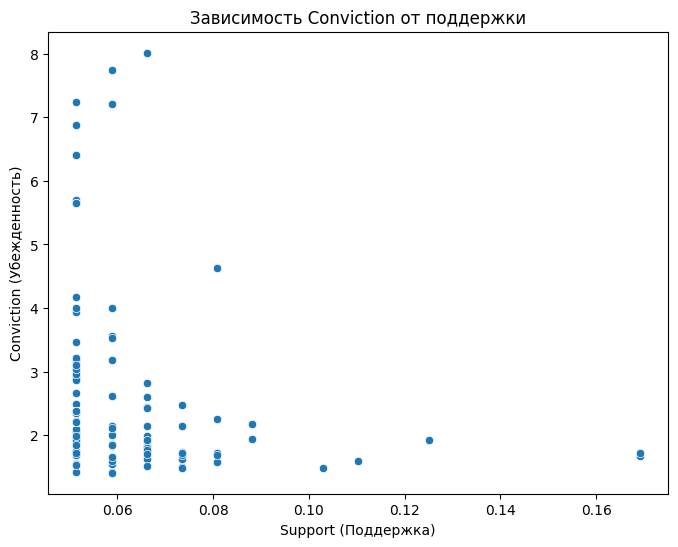

In [114]:
# правила для некоторых выбранных стран
selected_f = selected.loc[(selected.sex == 'm')&(selected.sex == 'f'),  ['artist', 'user']].pivot_table(index = 'user', columns = 'artist', aggfunc = any, fill_value=False).astype('int')
freq_items = ml.apriori(selected_f.astype('bool'), min_support = 0.05, use_colnames = True)
rules = ml.association_rules(freq_items_FI, metric = "confidence", min_threshold = 0.5)

# График зависимости Conviction от поддержки
plt.figure(figsize=(8, 6))
sns.scatterplot(x='support', y='conviction', data=rules)
plt.title('Зависимость Conviction от поддержки')
plt.xlabel('Support (Поддержка)')
plt.ylabel('Conviction (Убежденность)')
plt.show()

Из графига можно предположить, что при маленькой поддержке вероятность сильной взаимосвязи объектов больше, чем при высокой поддержке.

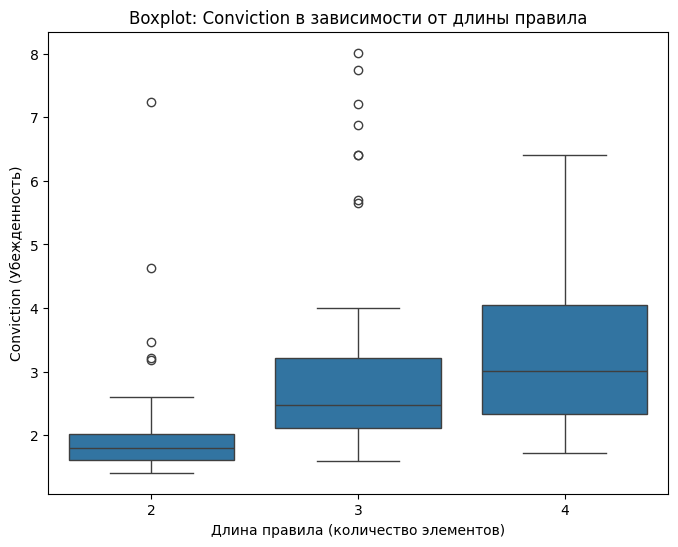

In [115]:
# Добавляем столбец с длиной правил (сумма длины antecedents и consequents)
rules['rule_length'] = rules['antecedents'].apply(lambda x: len(x)) + rules['consequents'].apply(lambda x: len(x))

# Диаграмма boxplot для Conviction в зависимости от длины правила
plt.figure(figsize=(8, 6))
sns.boxplot(x='rule_length', y='conviction', data=rules)
plt.title('Boxplot: Conviction в зависимости от длины правила')
plt.xlabel('Длина правила (количество элементов)')
plt.ylabel('Conviction (Убежденность)')
plt.show()


Чем длиннее правило, тем больше размах убежденности, и среднее значение оценки качества увеличивается, то есть при более длинном правиле связь между объектами более сильная.